# Load the Data

In [ ]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [ ]:
sales_data_file_path = "/content/sales_data.csv"
play_tennis_file_path = "/content/playTennis.xlsx"

sales_data = pd.read_csv(sales_data_file_path)
play_tennis = pd.read_excel(play_tennis_file_path)

# load data dari dataset yang tersedia di library sklearn
iris_data = load_iris()
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names) # ubah ke dataframe
iris_df['target'] = iris_data.target

# 'very basic' Data Processing

"The first step in any machine learning project is familiarize yourself with the data"

Setelah kita mendapatkan data langkah selanjutnya adalah Data Preprocessing dimana kita menilai kualitas data, explore data yang kita miliki dan melakukan cleaning jika diperlukan. Ketika kita melakukan data preprocessing terdapat beberapa hal yang bisa kita lakukan, beberapa diantaranya atau best practice-nya adalah di bawah berikut:

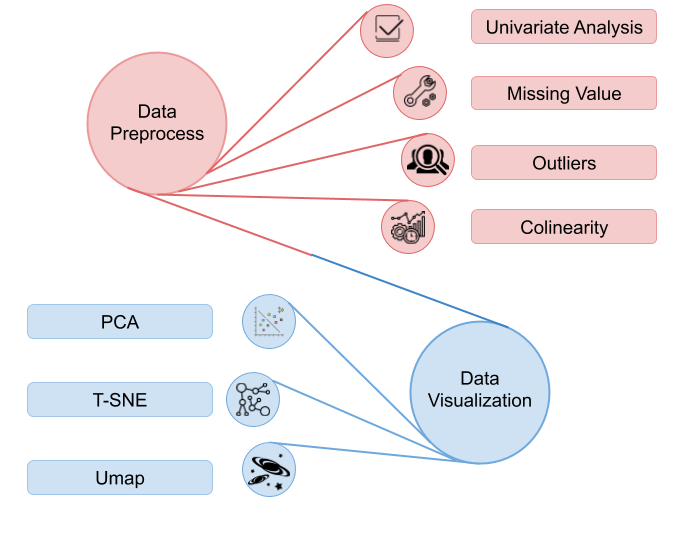

(source: https://blog.ml.cmu.edu/2020/08/31/2-data-exploration/)

## 1. check Basic information

Tahap yang paling utama ada adalah melihat overview data si dataset yang akan kita kerjakan, bisa dari nama kolom-kolom nya, tipe data-nya dan lain-lain

### check basic infomation dari dataset iris

In [ ]:
iris_df.head()

In [ ]:
iris_df.tail()

In [ ]:
iris_df.info()

In [ ]:
print("Jumlah kolom: ", iris_df.shape[1])
print("Jumlah instance: ", iris_df.shape[0])
print("nama-nama kolom: ", list(iris_df.columns))

### check basic infomation dari dataset playTennis

In [ ]:
# silahkan cari basic information mengenai dataset playTennis

### check basic infomation dari dataset sales_data

In [ ]:
# silahkan cari basic information mengenai dataset sales_data

## 2. Summary Statistic
Check for general insights, including mean, median, min, and max values.

### summary statistic untuk data iris

In [ ]:
iris_df.describe()

Kita dapat mengetahui 8 informasi dari setiap kolom. Kolom yang pertama 'count', menunjukkan berapa banyak baris atau instance yang memiliki nilai atau non-missing values.

Baris kedua adalah nilai rata-rata. Selanjutnya ada 'std' yang artinya standard deviation. dan seterusnya

### summary statistic untuk data playTennis

In [ ]:
# silahkan lakukan hal yang sama

### Summary statistic untuk data sales

In [ ]:
# xixi

## 3. Check for Missing Values dan duplicate values

### Check for missing values dan duplicate values untuk data iris

In [ ]:
print("Jumlah missing values per kolom:\n", iris_df.isnull().sum())
print("Jumlah duplikasi: ", iris_df.duplicated().sum())

In [ ]:
# remove duplicate
iris_df.drop_duplicates(inplace=True)

In [ ]:
# drop missing value
iris_df = iris_df.dropna()
print("Dataset setelah menghapus missing values:")
print(iris_df.shape)  # Check new dimensions

### Check for missing values dan duplicate values untuk data playTennis

### Check for missing values dan duplicate values untuk data sales

## 4. Data Distribution & Outlier Detection

### Data iris

In [ ]:
# Histogram
iris_df.hist(figsize=(15,6), bins=20)
plt.show()

# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=iris_df.iloc[:, :-1])  # Exclude 'target'
plt.show()

### Data playtennis

### Data sales

## 5. Correlation Analysis

### Data Iris

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(iris_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

## 6. Pairplot for Relationship Analysis

### data iris

In [ ]:
sns.pairplot(iris_df, hue='target', diag_kind='kde')
plt.show()


## 7. Distribution of Features by target

### data iris

In [ ]:
plt.figure(figsize=(10,6))
for column in iris_df.columns[:-1]:  # Exclude 'target'
    sns.boxplot(x='target', y=column, data=iris_df)
    plt.show()

### data play tennis

### data sales

## 8. Outlier Detection Using IQR

### data iris

In [ ]:
Q1 = iris_df.iloc[:, :-1].quantile(0.25)
Q3 = iris_df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

outliers = iris_df[((iris_df.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (iris_df.iloc[:, :-1] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected:")
print(outliers)


# Warp UP

yang telah kita pelajari merupakan basic dari understanding dan exploration data sering kali kita perlu melakukan lebih banyak tindakan dan analisis dari yang kita lakukan sebelumnya dan pastinya lebih kompleks dan memakan waktu.Terdapat beberapa suplemen yang dapat teman-teman 'cerna', seperti:

- Feature engineering

https://www.analyticsvidhya.com/blog/2021/10/a-beginners-guide-to-feature-engineering-everything-you-need-to-know/


- EDA (Exploratory Data Analysis)
https://medium.com/towards-data-science/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184
https://youtu.be/rr-KwIjinpM?si=v4BZNKuJvda9vGZ-


dan lainnya.


## studi kasus


1. Handling Missing Data

Q: Bagaimana cara menangani missing values dalam dataset?

A: Beberapa cara menangani missing values:

Menghapus baris atau kolom yang memiliki missing values terlalu banyak.
Mengisi nilai yang hilang menggunakan mean/median/mode.
Menggunakan teknik imputasi lanjutan seperti KNN imputation atau regresi.
Menggunakan model machine learning untuk memprediksi nilai yang hilang.

Q: Apa dampak jika missing values dibiarkan begitu saja dalam dataset?

A: Dapat menyebabkan error pada model, mengurangi akurasi prediksi, atau menyebabkan model gagal berfungsi jika algoritma tidak bisa menangani missing values.

2. Handling Categorical Data

Q: Apa perbedaan antara Label Encoding dan One-Hot Encoding?

A:
Label Encoding → Mengubah kategori menjadi angka (misal: "Merah" → 0, "Biru" → 1).
One-Hot Encoding → Membuat kolom baru untuk setiap kategori dengan nilai 0 atau 1.

Q: Kapan sebaiknya menggunakan Label Encoding dibanding One-Hot Encoding?

A:
Label Encoding cocok untuk kategori yang memiliki hubungan ordinal (misalnya: "low", "medium", "high").
One-Hot Encoding lebih baik jika kategori bersifat nominal dan tidak memiliki hubungan urutan.

Q: apakah categorical data harus selalu kita label encoding atau one-hot encoding?

A:
Tidak selalu!

🔹 Kapan kita perlu melakukan encoding?
Jika model tidak bisa menangani data kategori langsung.
Model seperti Linear Regression, SVM, KNN, Neural Networks, dan XGBoost umumnya membutuhkan encoding.
Decision Tree dan Random Forest bisa menangani kategori tanpa encoding (tergantung implementasi).
Jika data kategori bersifat nominal (tidak berurutan).
Contoh: Warna baju (Merah, Biru, Hijau) → One-Hot Encoding lebih baik karena tidak ada hubungan ordinal.
Jika data kategori bersifat ordinal (ada urutan).
Contoh: Ukuran baju (S, M, L, XL) → Label Encoding lebih cocok karena ada hubungan antar nilai.

🔹 Kapan encoding bisa dihindari?
Jika model bisa menangani data kategori langsung.
Contohnya: Decision Tree, Random Forest, CatBoost dapat bekerja dengan data kategori tanpa encoding.
Jika kategori sudah memiliki representasi numerik yang bermakna.
Contoh: Kode Pos, ID Produk, atau NIK → Tidak perlu diubah karena angkanya tidak merepresentasikan hubungan matematis.
Jika jumlah kategori sangat besar dan sparse.
Contoh: Nama kota atau ID pelanggan dengan puluhan ribu nilai unik → Target Encoding atau Embedding lebih efisien daripada One-Hot Encoding.


# Extra

Lalu, cara memilih algoritma machine learning yang sesuai gimana?

1. Structured Data
Structured data is highly organized data stored in a fixed format, such as rows and columns in a database or CSV files.

Algoritma yang tepat tapi tidak terbatas pada:

a. linear regression

b. logistic regression

c. decision tree

d. random forest

e. K-Nearest Neighbours

f. Support Vector Machine

2. Text data
text data is unstuctured or semi-structured data consisting of words, sentence, or paragraphs, often found in documents, emails, and social media.

Algoritma yang tepat tapi tidak terbatas pada:

a. Naive bayes

b. Recurrent Neural Networks

c. Transformer Models

d. TF-IDF + logistic regression

3. Image Data
Image data consists of visual information represented as pixels, often stored in formats like JPEG, PNG, or BMP.

Algoritma yang tepat tapi tidak terbatas pada:

a. Convolutional Neural Networks

b. ResNET and VCG

c. Autoencoders

4. Time Series data
Time series data is a sequence of data points recorded at consistent time intervals, used for trend analysis and forecasting.

Algoritma yang tepat tapi tidak terbatas pada:

a. ARIMA & SARIMA

B. Exponential Smoothing

c. LSTMs

5. Categorical data
Categorical data consists of discete values representing labels or categories, such as colous, genders, or product types.

Algoritma yang tepat tapi tidak terbatas pada:

a. Decision Trees

B. Random Forest

c. Naive Bayes

d. Logistic Regression

6. Audio data
Audio data is sound information represented as waveforms or digital signals, stored in formats like MP3, MAV, or FLAC.

Algoritma yang tepat tapi tidak terbatas pada:

a. Recurrent Neural Network

B. CNN

c. Transformer Models

7. Unlabelled data
Unlabelled data is data that lacks predefined tags or target variables.

Algoritma yang tepat tapi tidak terbatas pada:

a. K-means clustering

B. hierarchical clustering

c. DBSCAN Clustering

d. Principal Component Analysis

credit @amankharwal.official
